## Logistic Regression

#### A model has been trained to predict a given person has purchased a car or not. ACCURACY:-60%

In [1]:
import pandas as pd
suv_data=pd.read_csv("suv.csv")

In [2]:
suv_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

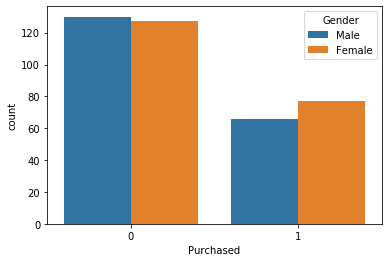

In [5]:
sns.countplot("Purchased",hue="Gender",data=suv_data)

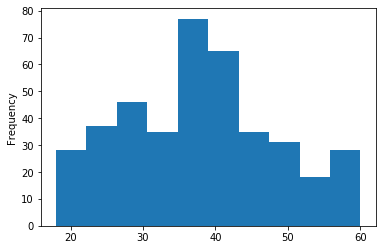

In [9]:
suv_data["Age"].plot.hist()

In [12]:
sex=pd.get_dummies(suv_data["Gender"],drop_first=True)

In [13]:
sex.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [36]:

suv_data.head()

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


In [37]:
suv_data.drop("User ID",axis=1,inplace=True)


In [39]:
new_data=suv_data

In [43]:
data=pd.concat([new_data,sex],axis=1,)

In [44]:
data.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [45]:
from sklearn.linear_model import LinearRegression

In [54]:
x=data.drop(["Purchased","Male"],axis=1)
y=data["Purchased"]

In [62]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [63]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [65]:
x_train ,x_test ,y_train,y_test=model_selection.train_test_split(x,y, test_size=0.25,random_state=0)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
from sklearn.preprocessing import StandardScaler

In [73]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [74]:
predic=logmodel.predict(x_test)
logmodel=LogisticRegression(random_state=0)
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
classification_report(y_test,predic)

C:\Users\ANIKET\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.68      1.00      0.81        68\n           1       0.00      0.00      0.00        32\n\n    accuracy                           0.68       100\n   macro avg       0.34      0.50      0.40       100\nweighted avg       0.46      0.68      0.55       100\n'

In [76]:
accuracy_score(y_test,predic)

0.68

In [77]:
confusion_matrix(y_test,predic)


array([[68,  0],
       [32,  0]], dtype=int64)

In [78]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [80]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
Male               0
dtype: int64